In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. What is Boosting in Machine Learning? Explain how it improves weak 
learners.

Ans- in Boosting we make first model on the training data then identify the error and other things the make another model with all the errors to compress the errors. From the second model onwards the are called weak learners and together they become strong learner.

2. What is the difference between AdaBoost and Gradient Boosting in terms 
of how models are trained?

Ans- AdaBoost focuses on increasing the weights of misclassified data points in each subsequent training round to give them more attention, while Gradient Boosting directly minimizes the loss function by training new models to predict the errors or residuals of the previous models. AdaBoost uses weighted voting for combining weak learners, whereas Gradient Boosting uses a sequential, additive approach to gradient descent on the loss function to build a strong model that gradually corrects mistakes.


3. How does regularization help in XGBoost?

Ans- Regularization in XGBoost helps prevent overfitting and improves the model's generalization performance on unseen data. It achieves this by adding penalty terms to the objective function, which discourage overly complex models.

4. Why is CatBoost considered efficient for handling categorical data? 

Ans- CatBoost is considered efficient for handling categorical data due to its native and automated approach to encoding, which minimizes the need for extensive manual preprocessing.

5. What are some real-world applications where boosting techniques are 
preferred over bagging methods? 

Ans- Boosting techniques are preferred over bagging methods for real-world applications when the goal is to reduce bias in simple, stable models or when higher accuracy is paramount even at the risk of some overfitting, such as in complex image and object identification tasks or when dealing with data mining problems where subtle patterns need to be captured.

6.  Write a Python program to: 
● Train an AdaBoost Classifier on the Breast Cancer dataset 
● Print the model accuracy 
(Include your Python code and output in the code box below.)

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = AdaBoostClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {round(score, 2)}")

Accuracy Score: 0.96


7.  Write a Python program to: 
● Train a Gradient Boosting Regressor on the California Housing dataset 
● Evaluate performance using R-squared score 
(Include your Python code and output in the code box below.) 

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = GradientBoostingRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = r2_score(y_test, y_pred)

print(f"R Square Score: {round(score, 2)}")

R Square Score: 0.78


8. Write a Python program to: 
<br>● Train an XGBoost Classifier on the Breast Cancer dataset 
<br>● Tune the learning rate using GridSearchCV 
<br>● Print the best parameters and accuracy

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_clf = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.11, 1, 1.1 ]
} 

clf = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid
)

clf.fit(X_train, y_train)

y_pred = clf.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {clf.best_params_}")
print(f"Accuracy Score: {round(score, 2)}")

Best Parameters: {'learning_rate': 1}
Accuracy Score: 0.96


9. Write a Python program to: 
<br>● Train a CatBoost Classifier 
<br>● Plot the confusion matrix using seaborn 
<br>(Include your Python code and output in the code box below.)

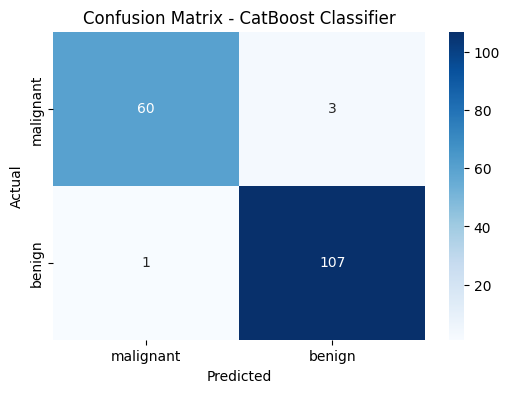

Accuracy: 0.9766081871345029


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=0
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

10. You're working for a FinTech company trying to predict loan default using 
customer demographics and transaction behavior. 
The dataset is imbalanced, contains missing values, and has both numeric and 
categorical features. 
<br>Describe your step-by-step data science pipeline using boosting techniques: 
<br>● Data preprocessing & handling missing/categorical values 
<br>● Choice between AdaBoost, XGBoost, or CatBoost 
<br>● Hyperparameter tuning strategy 
<br>● Evaluation metrics you'd choose and why 
<br>● How the business would benefit from your model 
<br>(Include your Python code and output in the code box below.)

## Step 0: Importing modules

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


## Step 1: Data Preprocessing
- Handle missing values  
- Encode categorical features  
- Scale numerical features  
- Split data into train/test  
- Balance dataset using **SMOTE**  


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target_column):
    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Separate categorical and numeric
    cat_cols = X.select_dtypes(include=["object", "category"]).columns
    num_cols = X.select_dtypes(include=[np.number]).columns

    # Impute missing values
    X[cat_cols] = X[cat_cols].fillna("Missing")
    X[num_cols] = X[num_cols].fillna(X[num_cols].median())

    # Encode categoricals
    le = LabelEncoder()
    for col in cat_cols:
        X[col] = le.fit_transform(X[col].astype(str))

    # Scale numeric
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Handle imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    return X_train_res, X_test, y_train_res, y_test

## Step 2: Model Selection (Boosting)
- We will try **CatBoost, XGBoost, and AdaBoost**  
- Choose the best one based on **ROC-AUC** and **F1-score**  

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def train_models(X_train, X_test, y_train, y_test):
    models = {
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        auc = roc_auc_score(y_test, preds)
        results[name] = auc
        print(f"{name} ROC-AUC: {auc:.4f}")
    return results

# Example usage:
# results = train_models(X_train_res, X_test, y_train_res, y_test)


## Step 3: Hyperparameter Tuning
We use **GridSearchCV** to tune parameters for the best model (example: CatBoost).  


In [9]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

def tune_catboost(X_train, y_train):
    params = {
        "iterations": [100, 300],
        "depth": [4, 6, 8],
        "learning_rate": [0.01, 0.1]
    }
    model = CatBoostClassifier(verbose=0, random_state=42)
    grid = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best Params:", grid.best_params_)
    return grid.best_estimator_


## Step 4: Evaluation
We evaluate using:  
- **Confusion Matrix**  
- **Classification Report** (Precision, Recall, F1)  
- **ROC-AUC Curve**  


In [10]:
from sklearn.metrics import classification_report, RocCurveDisplay

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, probs)
    plt.show()


## Step 5: Business Impact
By predicting **loan default risk**, the company can:  
- Reduce **bad loan issuance**  
- Improve **risk management**  
- Personalize interest rates (low-risk customers get lower rates)  
- Save costs by focusing recovery efforts on high-risk customers  
